## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 
a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#by finding the mean of convert column
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# the users are treatment and the landing page is old_page ??
treatment_in_old = df[(df.group == 'treatment') & (df.landing_page == 'old_page')]
treatment_in_old.shape[0]

1965

In [7]:
control_new = df[(df.group == 'control') & (df.landing_page == 'new_page')]
control_new.shape[0]


1928

In [8]:
#sum of them 
sum =1965+1928
sum


3893

f. Do any of the rows have missing values? No

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
#remove these rows
#first take a copy
df2= df
# now remove unwanted rows from new dataframe "copy"
df2.drop(df2.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
df2.drop(df2.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
duplicate_id =df2[df2.duplicated(['user_id'])]
 
print("Duplicate Rows in user_id :", duplicate_id, sep='\n')

Duplicate Rows in user_id :
      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [14]:
df2.query("user_id=='773192'")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
#remove user with index 1899 using timestamp and user id to avoid removing all users with the same timestamp
df2.drop(df2.query("timestamp == '2017-01-09 05:37:58.781806' and user_id == '773192'").index, inplace=True)

In [16]:
#checking
df2.query("user_id=='773192'")

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.`

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
#(df2.query['group'] == 'control' ('converted')).mean()
#(df2.query('group == control')['converted'] == '1').mean()
#it's the total number of individual who control& converted=1 divided by the total number of control individual.
df2[df2['group'] == 'control']['converted'].mean()



0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
#it's the total number of individual who tratement & converted=1 divided by the total number of treatment individual.
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
#df2[df2['landing_page'] == 'new_page'].mean() <--- take long time to run
# we can calculated like this also --> df2[df2['group'] == 'treatment'].mean()
#finde total number of users first
total_individual= df2.count()
#find number of users received the new page
individual_new_page = df2.query("landing_page == 'new_page'")
total_individual_new_page=individual_new_page.count()
total_individual_new_page

user_id         145310
timestamp       145310
group           145310
landing_page    145310
converted       145310
dtype: int64

In [21]:
total_individual_new_page / total_individual


user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

##### Answers:


**probability of an individual converting regardless of the page they receive : 0.119 -  11.9%**

**individual was in the control group, what is the probability they converted: 0.120  -  12%**

**individual was in the treatment group, what is the probability they converted: 0.118 -  11.8%**

**probability that an individual received the new page: 0.500 - 50%**

##### if we want round all results it will be like this:

**probability of an individual converting regardless of the page they receive : 0.119 -> 0.12  - 12%**

**individual was in the control group, what is the probability they converted: 0.120  ->  0.12 - 12%**

**individual was in the treatment group, what is the probability they converted: 0.118 -> 0.12 - 12%**

**-> So there is no diffrence between two groups ( control & treatment ). and half of users not  received the new page yet so we can't be sure if there is sufficient evidence to say that the new treatment page is better.**


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

##### Answer:
* H0: **$p_{new}$** =< **$p_{old}$** (new page is equal or worse than old page : Null) 
* H1: **$p_{new}$** > **$p_{old}$** (new page is better than old page : Alternative) 
**The alternative is what we want to prove by trying to reject the null hypothesis**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
#p_new = df2[df2['landing_page']=='new_page']['converted'].mean()
p_new=df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
#p_old = df2[df2['landing_page']=='old_page']['converted'].mean()
p_old=df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [24]:
n_new = df2.query('landing_page == "new_page"')
#find number of rows
n_new = n_new.shape[0] 
n_new

145310

d. What is $n_{old}$?

In [25]:
n_old = df2.query('landing_page == "old_page"')
#find number of rows
n_old = n_old.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
#refrence:www.sharpsightlabs.com/blog/numpy-random-choice/

#using n_new as size and p_new as chance of 0's and 1's
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
new_page_converted


array([0, 0, 1, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
#refrence:https://knowledge.udacity.com/questions/217291
#obs_diff = new_page_converted.mean() - old_page_converted.mean()
new_page_converted.mean() - old_page_converted.mean()

-0.0006352616449361581

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
#creat array to store results
p_diffs = []

for _ in range(10000):
    #propability for 0 is (1-p_new) and probaility for 1 is (p_new)
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new]) 
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
    obs_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(obs_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([8.000e+00, 1.150e+02, 5.600e+02, 1.805e+03, 2.985e+03, 2.691e+03,
        1.364e+03, 4.040e+02, 6.600e+01, 2.000e+00]),
 array([-0.00464121, -0.00368519, -0.00272916, -0.00177313, -0.0008171 ,
         0.00013893,  0.00109496,  0.00205099,  0.00300702,  0.00396305,
         0.00491907]),
 <a list of 10 Patch objects>)

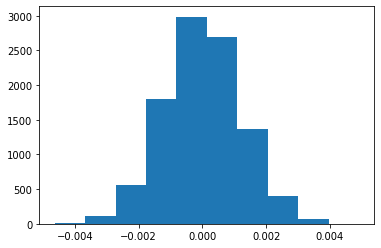

In [30]:
plt.hist(p_diffs)

In [31]:
np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5) #Confidence Intervals

(-0.002383900133091685, 0.0024068745314982185)

In [32]:
#find actual difference
actual_difference = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
actual_difference


-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

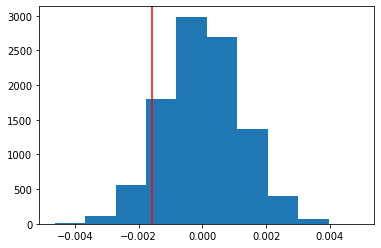

In [33]:
plt.hist(p_diffs)
plt.axvline(x=actual_difference , color='r')


In [34]:
p_diffs = np.array(p_diffs)
p_value = (p_diffs > actual_difference).mean()
p_value

0.9078

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In [ ]:
#REFRENCE: https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/p-value-approach


**Called p -value and it's less than 0.05 and because we assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%" . we failed to reject the null hypothesis.
Until now there is now diffrence between two pages may need to add more features in new page or run the experiment for more time**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

#convert_old = df2[df2['group']=='control']['converted'].count()
#convert_new = df2[df2['group']=='treatment']['converted'].count()
 
convert_old = df2.query('group == "control" & converted == 1').shape[0]
convert_new = df2.query('group == "treatment" & converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
#https://www.statsmodels.org/0.6.1/generated/statsmodels.stats.proportion.proportions_ztest.html
#we can use smaller or larger
z_score, p_value =sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score)
print(p_value)

-1.3109241984234394
0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

* **the z-score means the test statistic is very close to the null mean, and The p-value is the confidence level for our null hypothesis**

* **the z-score : -1.3109**
* **P-Value :0.905**
* **Yes the p-value similar to previous result  ,so we failed to reject the null hypothesis.**



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

 a logistic regression because conversion column data are binary "we want predict only two possible outcomes"

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [52]:
#https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

#create a column for the intercept
df2['intercept']=1
#create a dummy variable column "pd.get_dummies creates a new dataframe which consists of zeros and ones"
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']
df2.head(8)


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [53]:
import statsmodels.api as sm
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        06:57:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

* **The p-value associated with ab_page is 0.190**
* **in previous section was based on a hypothesis and we trying to reject the null hypothses but we couldn't because the p-value and z- score was less than what we assume "Type 1 error rate of 5% " , while in this section we check if there is a difference in the conversion rates of the pages and the p-value associated with ab_page is 0.190 , we notices that there is a diffrence but still tell us there is no diffrence between old & new page**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**adding other factors is a good idea to avoid Simpson's Paradox**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [55]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [56]:
#check
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [57]:
#see how many countries are there
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [58]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [59]:
#CHECK
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [60]:
#regression model
#logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','UK','US']])  not working well
#https://knowledge.udacity.com/questions/249223

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','UK']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:               2.323e-05
Time:                        06:57:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

* **CA P-VALUE: 0.130**
* **UK P-VALUE:0.457**
* **both are greater than 5%**


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [62]:
df_new['US_page'] = df_new['US']*df_new['ab_page']
df_new['CA_page'] = df_new['CA']*df_new['ab_page']
df_new['UK_page'] = df_new['UK']*df_new['ab_page']

In [63]:
#CHECK
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,US_page,CA_page,UK_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0,1


In [64]:
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','CA_page', 'UK_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:               3.351e-05
Time:                        06:57:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0183      0.013     -1.449      0.147      -0.043       0.006
CA_page       -0.0644      0.038     -1.679      0.093      -0.140       0.011
UK_page        0.0257      0.019      1.363      0.173      -0.011       0.063
==============================================================================
"""

**all reesults are stell grater than alpha value 5% so we can't reject the null hypothesis and we accept the null hypothesis**

## Summary:
**in this project we start with some porbability for ab data set and found some probability like individual was in the control group, what is the probability they converted and individual was in the treatment group, what is the probability they converted
and there was no diffrence between two groups and we can't be sure if there is sufficient evidence to say that the new treatment page is better.after that we apply A/B Test and assume Type I error rate of 5% , and put our hypothesis which is end with result of p-valu :0.905 hence we failed to reject the null hypothesis.at the end we start using A regression approach by fitting a logistic regression model and the result was aggre with A\B Test result.
So, After all these steps we faild to reject the null hypothesis which is: new page is equal or worse than old page.**